In [9]:
pip install astropy sep #This is so I can work on Final on my Ipad also (installing in notebook vs comp)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import sep


*importing all setup modules and setting figure size!* 

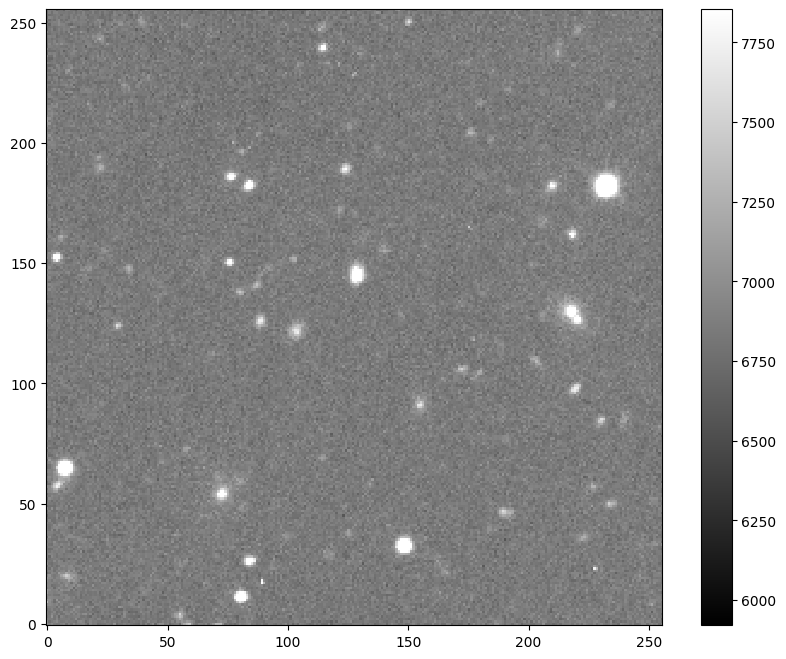

In [28]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]
# "/Users/anthonymartinez/Downloads/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
with fits.open("/Users/anthonymartinez/Downloads/image.fits") as hdul:
    data = hdul[0].data # Open the fits image as a 2D array

#Show the image!
m,s = np.mean(data), np.std(data)
plt.imshow(data,interpolation = 'nearest', cmap = 'gray', vmin = m - s, vmax= m+s, origin = 'lower')
plt.colorbar()
plt.savefig('Example_Image.png')

*Background Subtraction- Measuring background, calulating global mean and noise of image, then subtracting the background*

6852.04931640625 65.46174621582031


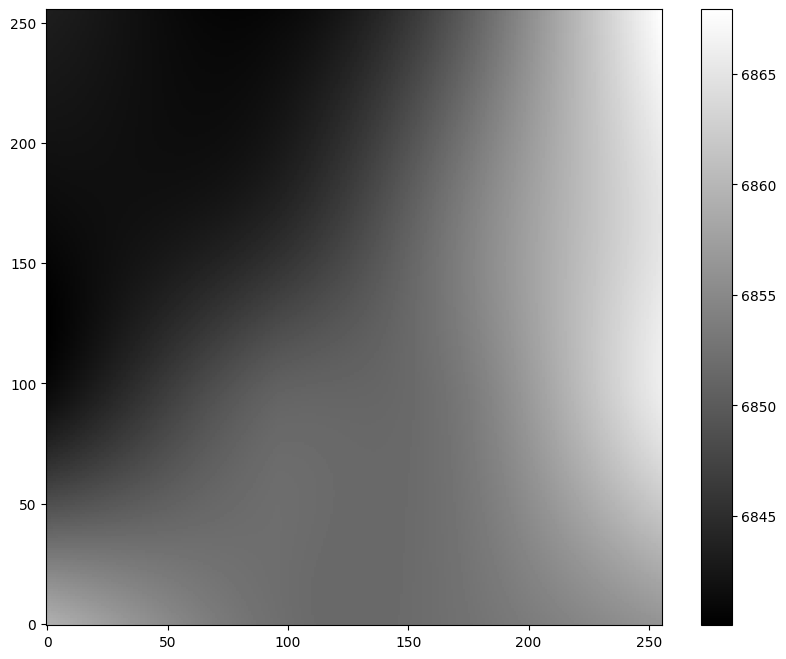

In [41]:
bkg = sep.Background(data)

print(bkg.globalback, bkg.globalrms) # get a global mean and noise of the image background.
bkg_image = bkg.back()

plt.imshow(bkg_image, interpolation = 'nearest', cmap = 'gray', origin='lower')
plt.colorbar(); #showing background
bkg_rms = bkg.rms()
plt.savefig('Background.png')

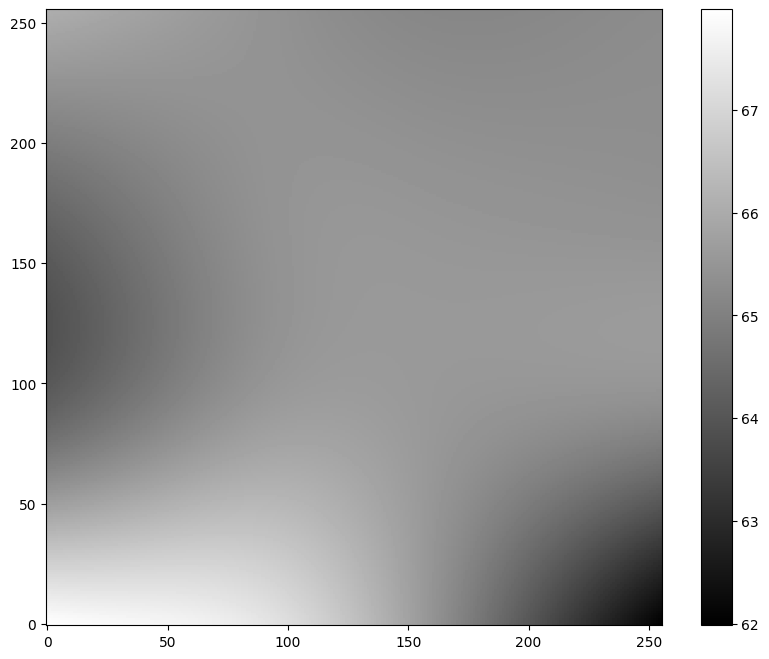

In [43]:
plt.imshow(bkg_rms, interpolation = 'nearest', cmap = 'gray', origin='lower')
plt.colorbar(); # And its noise as well

data_sub = data - bkg #subtract the background
plt.savefig('BackgroundSubtracted.png')

# *Object Deletion:* Running object detection on background-subtracted data! 

In [32]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms) #setting detection threshold = 1.5
#how many objects counted
len(objects) # 68 


68

*Overplotting the object coordinates with some basic shape parameters on the image*

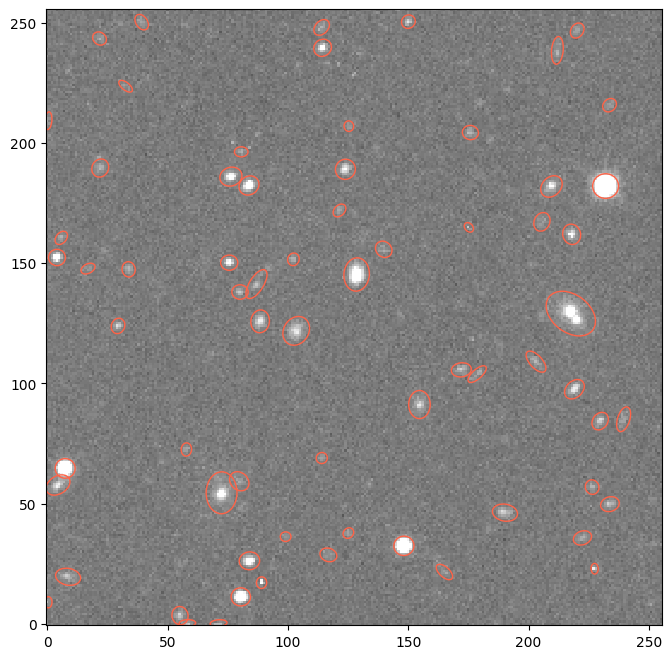

In [38]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plotting an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('tomato')
    ax.add_artist(e)
plt.savefig('DetectedObjects.png')

# *Aperture Photometry:* Simple circular photometry with a 3-pixel radius at the locations of the objects!

In [40]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)
for i in range(10): #
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 2249.157852 +/- 291.027799
object 1: flux = 3092.217500 +/- 291.592199
object 2: flux = 5949.861113 +/- 356.561993
object 3: flux = 1851.419824 +/- 295.028805
object 4: flux = 72736.380312 +/- 440.172199
object 5: flux = 3860.756895 +/- 352.163163
object 6: flux = 6418.902715 +/- 357.458957
object 7: flux = 2210.714238 +/- 350.791233
object 8: flux = 2741.609297 +/- 352.277749
object 9: flux = 20916.877363 +/- 376.966141
